In [11]:
import torch, torchvision, torchvision.transforms as transforms
import numpy as np
print(torch.__version__, torch.cuda.is_available())

1.12.1 False


In [7]:
def get_data(training):
    return torchvision.datasets.FashionMNIST(
        root="./datasets/",
        train=training,
        download=True,
        transform=transforms.ToTensor()
    )

training_set_loader =   torch.utils.data.DataLoader(get_data(training=True), batch_size=10)
validation_set_loader = torch.utils.data.DataLoader(get_data(training=False), batch_size=10)

labels: tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])
torch.Size([3, 32, 302])
labels: tensor([4, 5, 7, 3, 4, 1, 2, 4, 8, 0])
torch.Size([3, 32, 302])


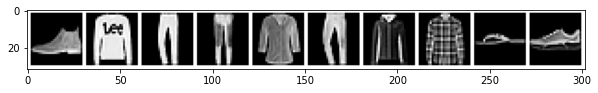

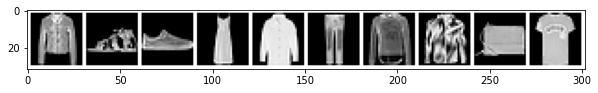

In [10]:
import matplotlib.pyplot as plt

it = iter(validation_set_loader)
for _ in range(2):
    training_batch = next(it)
    images, labels = training_batch

    print("labels:", labels)
    grid = torchvision.utils.make_grid(images, nrow=10, pad_value=1)
    print(grid.shape)
    plt.figure(figsize=(10,60))
    plt.imshow(torch.permute(grid, (1,2,0)))


In [3]:
import torch.nn as nn
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(2, 2)
        self.l2 = nn.Linear(2, 2)
    
    def forward(self, v):
        v = F.relu(self.l1(v))
        v = F.relu(self.l2(v))
        return v

In [14]:
xor_net = Network()
print(xor_net.l1.weight, xor_net.l2.weight)
xor_net(torch.tensor([1.,2.]))

Parameter containing:
tensor([[ 0.0187, -0.2195],
        [-0.4295,  0.6907]], requires_grad=True) Parameter containing:
tensor([[-0.2685,  0.5106],
        [ 0.0019,  0.6147]], requires_grad=True)


tensor([1.2279, 0.4007], grad_fn=<ReluBackward0>)